## Data collection
For data collection, we take the data from UCI Machine Learning called Online Retail dataset. The dataset itself is a transactional data that contains transactions from December 1st 2010 until December 9th 2011 for a UK-based online retail. Each row represents the transaction that occurs. It includes the product name, quantity, price, and other columns that represents ID.
The size of dataset is (541909,8). In this case, all of the rows are not used. Instead, 10000 rows are sampled from the dataset, and assumed that as the whole transactions that the customers do.


# # Customer Segmentation in Python

## Segmentation using K-Means clustering algorithm
Suppose that we have a company that selling some of the product, and you want to know how well does the selling performance of the product.

we have the data that can we analyze, but what kind of analysis that we can do? 

Well, we can segment customers based on their buying behaviour on the market. 

Keep in mind that the data is really huge, and we can not analyze it using a bare eye. We have to use machine learning algorithms and the power of computing for it.

This project will show how to cluster customers on segments based on their behaviour using the K-Means algorithm in Python. 
This project will help on how to do customer segmentation step-by-step from preparing the data to cluster it. WE hve used here RFM model i.e. recency frequency and monetary model.

### Plan Of Approach
Before we get into the process, I will give you a brief on what kind of steps we will get.
- Gather the data
- Pre-process the data
- Explore the data
- Cluster the data
- Interpret the result

### The Analysis

#### Gathering Data: Imported all the necessary liberaries pandas for data handeling matplotlib and seaborn for data visualisation and sckitlearn for training our data

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_excel(r'dataset.xlsx')

In [ ]:
df = df[df['CustomerID'].notna()]

In [ ]:
df_fix = df.sample(10000, random_state = 42)
df_fix.shape

(10000, 8)

In [ ]:
df_fix.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom


# Data Preprocessing
#### Create RFM Table: Due some feature engineering in which we try to extract three features namely recency(how recently products are bought) frequency(how often products  are bought) and monetary value(what is the value spent by each customer)

In [ ]:
# Convert to show date only
from datetime import datetime
df_fix["InvoiceDate"] = df_fix["InvoiceDate"].dt.date

# Create TotalSum colummn
df_fix["TotalSum"] = df_fix["Quantity"] * df_fix["UnitPrice"] #total sum is the product of unit price and no of units

# Create date variable that records recency
import datetime
snapshot_date = max(df_fix.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers = df_fix.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [ ]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30


#### Manage Skewness: Converted the given data into a non skewed data by using box-cox transformation

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

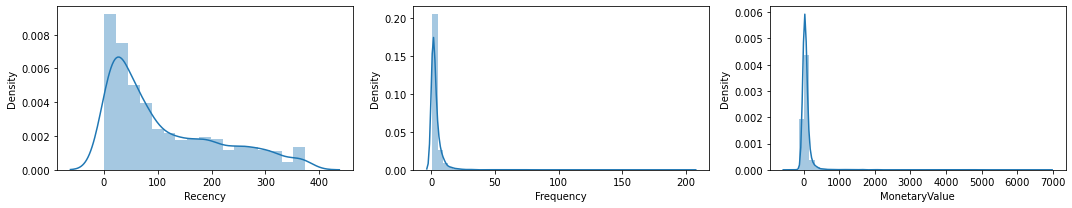

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(customers[x].skew().round(2))
    print(np.log(customers[x]).skew().round(2))
    print(np.sqrt(customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

In [ ]:
# analyze_skewness('Recency')

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

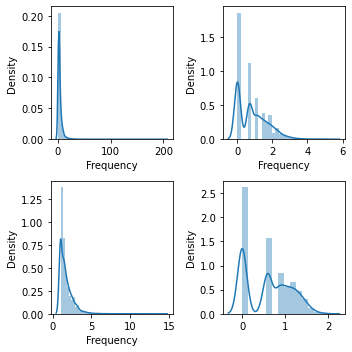

14.77
0.85
3.67
0.16


In [ ]:
analyze_skewness('Frequency')

C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


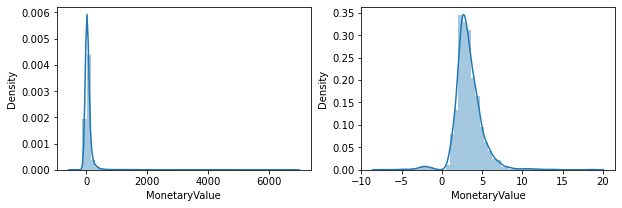

16.63
1.16


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customers['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customers['MonetaryValue']), ax=ax[1])
plt.show()
print(customers['MonetaryValue'].skew().round(2))
print(np.cbrt(customers['MonetaryValue']).skew().round(2))

In [ ]:
pd.Series(np.cbrt(customers['MonetaryValue'])).values

array([ 5.10702607,  4.94445183,  6.78785317, ..., -1.66910753,
        4.27320639,  4.0872497 ])

In [ ]:
# Set the Numbers
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
2685,7.832068,0.591193,3.408514
2686,1.269495,1.435599,5.907565
2687,4.288385,0.591193,-1.669108
2688,1.665555,1.615329,4.273206
2689,6.340700,1.017445,4.087250


#### Centering and Scaling Variables: we convert the data to have the same mean and variance.We have to normalize it. To normalize, we can use StandardScaler object from scikit-learn library to do it. The code will look like this.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[ 0. -0.  0.]
[1. 1. 1.]


In [ ]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-0.493794,1.012426,1.017503
1,1.232949,-0.017412,0.925115
2,-0.994917,-0.017412,1.972690
3,-0.012582,1.012426,0.572565
4,1.155005,-0.017412,-0.056441


### Modelling
#### Choose k-number: To make segmentation from the data, we can use the K-Means algorithm to do this. K-Means algorithm is an unsupervised learning algorithm that uses the geometrical principle to determine which cluster belongs to the data. By determine each centroid, we calculate the distance to each centroid. Each data belongs to a centroid if it has the smallest distance from the other. It repeats until the next total of the distance doesn’t have significant changes than before.

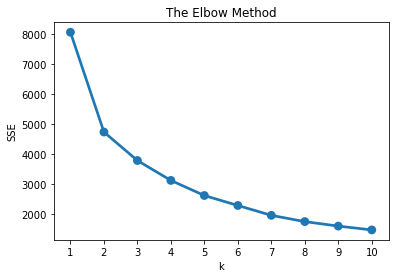

In [ ]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2690,)

###Based on our observation, the k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Therefore, our best model for the data is K-Means with the number of clusters is 3.

In [ ]:
customers.shape

(2690, 3)

### Cluster Analysis

In [ ]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,5,133.20,2
12348.0,249,2,120.88,1
12349.0,19,2,312.75,2
12352.0,73,5,80.85,2
12354.0,233,2,33.30,1


In [ ]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          47.2       1.6          21.6   808
1         226.6       1.6          28.7   960
2          46.3       7.7         166.1   922

### Snake Plots

In [ ]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.493794,1.012426,1.017503,12347.0,2
1,1.232949,-0.017412,0.925115,12348.0,1
2,-0.994917,-0.017412,1.972690,12349.0,2
3,-0.012582,1.012426,0.572565,12352.0,2
4,1.155005,-0.017412,-0.056441,12354.0,1


In [ ]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,2,Recency,-0.493794
1,12348.0,1,Recency,1.232949
2,12349.0,2,Recency,-0.994917
3,12352.0,2,Recency,-0.012582
4,12354.0,1,Recency,1.155005


C:\Users\CG-DTE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

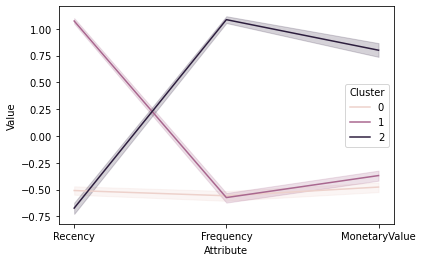

In [ ]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

In [ ]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          47.2       1.6          21.6   808
1         226.6       1.6          28.7   960
2          46.3       7.7         166.1   922

cluster 2 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a ###loyal customer.
Then, the cluster 0 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of ###new customer.
Finally, the cluster 1 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of ###saturated or old customers.

In [ ]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,MonetaryValue,Recency
Cluster,,,,
0,NaN,-0.565538,-0.706882,-0.574473
1,NaN,-0.558111,-0.610787,1.042981
2,NaN,1.076727,1.255440,-0.582524


# Conclusion
The customer segmentation is really necessary for knowing what characteristics that exist on each customer. Which customer loyal customer, new customer and churned customers is clearly segmented by using K-Means clustering. The project has shown to you how to implement it using Python. 
We infer that cluster 2 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.
Then, the cluster 0 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customers.
Finally, the cluster 1 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.
SUGGESTIONS:- 
1) Since 0 is our new customer segmentation we can try to convert them into loyal customer by providing them the attractive offers and discount to maximize our profit.
2) cluster 1 is our churned out customer that means either they are saturated or not interested in our shop so theres not much scope for improvement in this segment.
3) cluster 3 is our loyal and most important cluster and keeping and increasing this cluster is the most important thing for the shop.


### References
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
https://www.marketingprofs.com/tutorials/snakeplot.asp reference for snake plot